# 6.4 Supervised Machine Learning: Regression

## Imports

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\malac\Downloads\Realtor.com cf'

In [4]:
path

'C:\\Users\\malac\\Downloads\\Realtor.com cf'

In [9]:
df = pd.read_pickle(os.path.join(path, '03 Scripts', 'realtor-dataset-100k.pkl'))

# Data Cleaning

In [14]:
# Check columns

df.columns

Index(['status', 'price', 'bed', 'bath', 'acre_lot', 'city', 'state',
       'house_size', 'sold_date'],
      dtype='object')

In [15]:
# Check shape of df

df.shape

(9307, 9)

In [16]:
df.head()

,status,price,bed,bath,acre_lot,city,state,house_size,sold_date
0,for_sale,105000,3,2,0,Adjuntas,Puerto Rico,920,0
1,for_sale,80000,4,2,0,Adjuntas,Puerto Rico,1527,0
2,for_sale,67000,2,1,0,Juana Diaz,Puerto Rico,748,0
3,for_sale,145000,4,2,0,Ponce,Puerto Rico,1800,0
5,for_sale,179000,4,3,0,San Sebastian,Puerto Rico,2520,0


In [17]:
# Check for nulls

df.isnull().sum()

status        0
price         0
bed           0
bath          0
acre_lot      0
city          1
state         0
house_size    0
sold_date     0
dtype: int64

In [18]:
# Check for dups

dups = df.duplicated()

In [20]:
dups.shape

(9307,)

no dups

## Check for extreme values

<AxesSubplot:xlabel='price', ylabel='Count'>

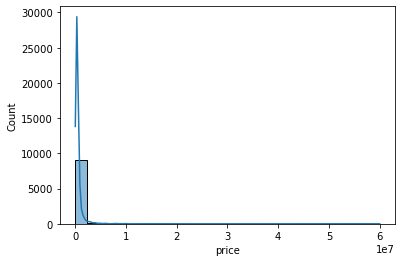

In [27]:
# Check for extreme values in price

sns.histplot(df['price'], bins = 25, kde = True)

In [28]:
# Check mean

df['price'].mean()

588837.2057591061

In [29]:
# Check median

df['price'].median()

349900.0

In [30]:
# Check max

df['price'].max()

60000000

## We have an extreme outlier of 60,000,000 in the price. This could by a typo for 6,000,000 but i will leave it in the data for now because that price is possible.

<AxesSubplot:xlabel='bed', ylabel='Count'>

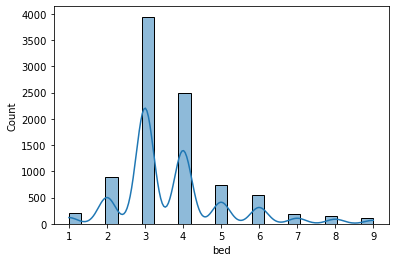

In [26]:
# Check for extreme values in bed

sns.histplot(df['bed'], bins = 25, kde = True)

In [31]:
# Check mean

df['bed'].mean()

3.7063500590953047

In [33]:
# Check median

df['bed'].median()

3.0

In [34]:
# Check max

df['bed'].max()

9

## No outliers will leave as is

<AxesSubplot:xlabel='bath', ylabel='Count'>

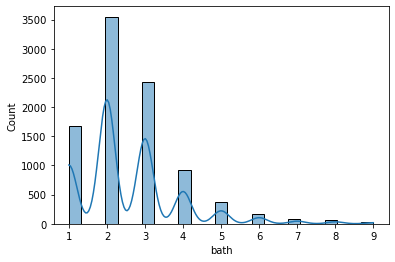

In [25]:
# Check for extreme values in bath

sns.histplot(df['bath'], bins = 25, kde = True)

In [35]:
# Check mean

df['bath'].mean()

2.5756957129042655

In [36]:
# Check median

df['bath'].median()

2.0

In [37]:
# Check max

df['bath'].max()

9

## No outliers will leave data as is

# Data prep for regression analysis

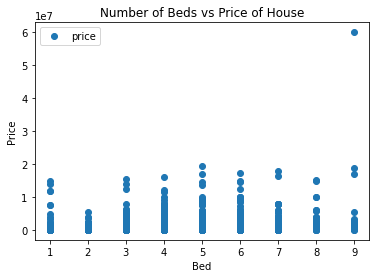

In [38]:
# Create scatterplot for price and bed

df.plot(x = 'bed', y='price',style='o') # The style option creates a scatterplot
plt.title('Number of Beds vs Price of House')  
plt.xlabel('Bed')  
plt.ylabel('Price')  
plt.show()

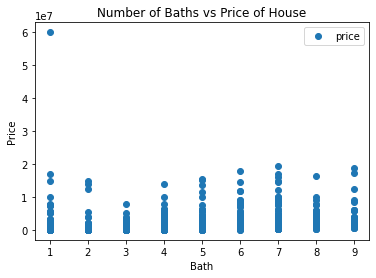

In [39]:
# Crete scatterplot for price and bath

df.plot(x = 'bath', y='price',style='o')
plt.title('Number of Baths vs Price of House')
plt.xlabel('Bath')
plt.ylabel('Price')
plt.show()

## Bed shows a little stronger correlation so we will use tht correlation for this task. 

In [40]:
# Reshape variables in Numpys and put them into arrays

X = df['bed'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [41]:
X

array([[3],
       [4],
       [2],
       ...,
       [4],
       [3],
       [3]], dtype=int64)

In [42]:
y

array([[105000],
       [ 80000],
       [ 67000],
       ...,
       [785000],
       [465000],
       [399900]], dtype=int64)

In [43]:
# Split data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [48]:
# Create regression object

regression = LinearRegression()

In [49]:
# Fit to train set

regression.fit(X_train, y_train)

LinearRegression()

In [50]:
# Predict values of y using X

y_predicted = regression.predict(X_test)

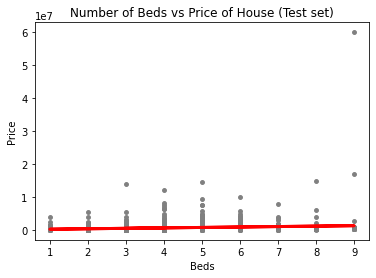

In [51]:
# Create plot that shows regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Beds vs Price of House (Test set)')
plot_test.xlabel('Beds')
plot_test.ylabel('Price')
plot_test.show()

## You can see the data is not close to fitting the model. There are a lot of outliers.

In [53]:
# Create objects that contain  model summary statistics

rmse = mean_squared_error(y_test,y_predicted)
r2 = r2_score(y_test, y_predicted)

In [54]:
# Print model sumaary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[133814.95190716]]
Mean squared error:  2101984705138.9146
R2 score:  0.028246161512348156


In [55]:
y_predicted

array([[627244.50703066],
       [493429.5551235 ],
       [627244.50703066],
       ...,
       [493429.5551235 ],
       [627244.50703066],
       [493429.5551235 ]])

In [56]:
# Create dataframe of actual and predicted values

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()}) 

In [57]:
data.head(20)

,Actual,Predicted
0,449500,6.272445e+05
1,384800,4.934296e+05
2,519900,6.272445e+05
3,235000,4.934296e+05
4,629000,6.272445e+05
5,115000,6.272445e+05
6,250000,8.948744e+05
7,132000,4.934296e+05
8,699000,6.272445e+05
9,249900,8.948744e+05


## The model was not very accurate in predicting the price or showing a correlation. I think a lot of this has to do with the sample size of the data since it only contains information from 7 different states. Also, it impossible for one variabe alone to greatly influence the housing prices.